In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
filename = '/content/drive/MyDrive/1. STUDYING/ML/TD1/datingTestSet.txt'

Mounted at /content/drive


In [ ]:
# convert txt file to an array
import numpy as np
def file2matrix(filename):
  fr = open(filename)
  # read file, seperate each line to each list
  arrayOfLines = fr.readlines()
  # return size of table (number of people)
  numberOfLines = len(arrayOfLines)
  # create array filled by 0 with size is number of people * 3 column to fill Mat data
  returnMat = np.zeros((numberOfLines, 3))
  # create empty list for output
  classLabelVector = []
  # create fake index to fill data from 1st row of Mat table
  index = 0
  # start reading the data
  for l in arrayOfLines:
    # delete spaces if has
    line = l.strip()
    # create list from each line based on tab (\t) in the string
    listFromLine = line.split('\t')
    # fill the value of the 1st row of empty array with the first 3 values from the list
    returnMat[index,:] = listFromLine[0:3]
    # fill value for output(label) based on condition (read from right to left)
    if listFromLine[-1] == 'didntLike':
      classLabelVector.append(1)
    elif listFromLine[-1] == 'smallDoses':
      classLabelVector.append(2)
    elif listFromLine[-1] == 'largeDoses':
      classLabelVector.append(3)
    # increase the index to continue reading the next row
    index += 1
  return returnMat, classLabelVector

if __name__ == '__main__':
  datingDataMat, datingLabels = file2matrix(filename)
  print(datingDataMat)
 # print(datingLabels)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]


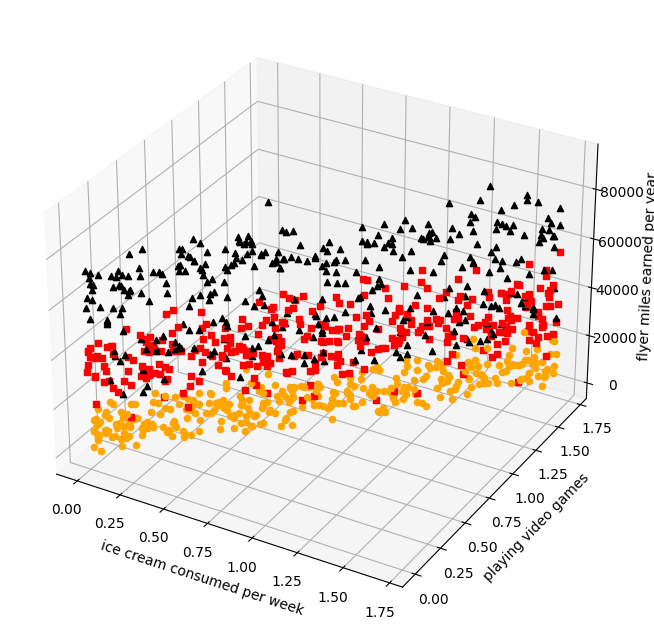

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(projection='3d')
for i in range(len(datingLabels)):
  if datingLabels[i]==1:
    c='black'
    m='^'
  if datingLabels[i]==3:
    c='red'
    m=','
  if datingLabels[i]==2:
    c='orange'
    m='o'
  xs = datingDataMat[i,2]
  ys = datingDataMat[i,2]
  zs = datingDataMat[i,0]
  ax.scatter(xs,ys,zs, marker = m, color = c)
ax.set_xlabel('ice cream consumed per week')
ax.set_ylabel('playing video games')
ax.set_zlabel('flyer miles earned per year')
plt.show()

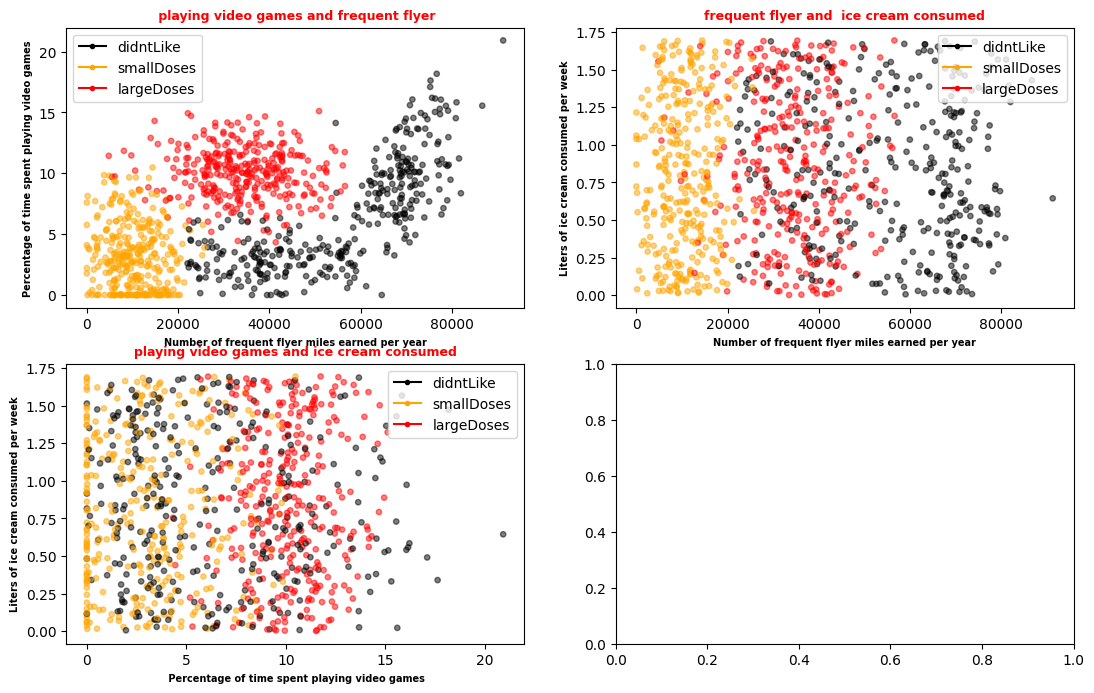

In [ ]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np


def showdatas(datingDataMat, datingLabels):

    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')


    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)

    axs0_title_text = axs[0][0].set_title(u' playing video games and frequent flyer')
    axs0_xlabel_text = axs[0][0].set_xlabel(u'Number of frequent flyer miles earned per year')
    axs0_ylabel_text = axs[0][0].set_ylabel(u'Percentage of time spent playing video games')
    plt.setp(axs0_title_text, size=9, weight='bold', color='red')
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')


    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)

    axs1_title_text = axs[0][1].set_title(u'frequent flyer and  ice cream consumed')
    axs1_xlabel_text = axs[0][1].set_xlabel(u'Number of frequent flyer miles earned per year')
    axs1_ylabel_text = axs[0][1].set_ylabel(u'Liters of ice cream consumed per week')
    plt.setp(axs1_title_text, size=9, weight='bold', color='red')
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')


    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)

    axs2_title_text = axs[1][0].set_title(u'playing video games and ice cream consumed')
    axs2_xlabel_text = axs[1][0].set_xlabel(u' Percentage of time spent playing video games')
    axs2_ylabel_text = axs[1][0].set_ylabel(u'Liters of ice cream consumed per week')
    plt.setp(axs2_title_text, size=9, weight='bold', color='red')
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')

    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')

    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])

    plt.show()


if __name__ == '__main__':

    datingDataMat, datingLabels = file2matrix(filename)
    showdatas(datingDataMat, datingLabels)

In [ ]:
# Data normalizing code
def autoNorm(dataSet):
  minVals = dataSet.min(0)
  maxVals = dataSet.max(0)
  ranges = maxVals - minVals
  normDataSet = np.zeros(np.shape(dataSet))
  m = dataSet.shape[0]
  normDataSet = dataSet - np.tile(minVals, (m,1))
  normDataSet = normDataSet/np.tile(ranges, (m,1))
  return normDataSet


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)
# chuyển raw data về dữ liệu phân phối chuẩn (1000 x3)
normMat = autoNorm(datingDataMat)
# shape(0): lấy size của bảng theo chiều dọc (số hàng), shape(1): lấy số cột
m = normMat.shape[0]
# lấy 90% data để train model
numTrainVecs = int(m * 0.9)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


In [ ]:
Train_datingDataMat=[]
Train_datingLabels=[]
Test_datingDataMat=[]
Test_datingLabels=[]
# cho i chạy từ 1 - 900
for i in range(numTrainVecs):
  # lấy tất cả dữ liệu ở hàng i của bảng data normalized gán vào training data
  Train_datingDataMat.append(normMat[i,:])
  Train_datingLabels.append(datingLabels[i])

for i in range(numTrainVecs,m):
  Test_datingDataMat.append(normMat[i,:])
  Test_datingLabels.append(datingLabels[i])

KNN.fit(Train_datingDataMat, Train_datingLabels)

KNeighborsClassifier()

In [ ]:
# evaluate the model (accuracy)
acc= KNN.score(Test_datingDataMat, Test_datingLabels)
print(acc)
print(datingDataMat)
print()

0.95
[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]



In [ ]:
resultList = ['didnt like','small doses','large doses']

ffMiles = float(input("Number of frequent flyer miles earned per year:"))
precentTats = float(input("Percentage of time spent playing video games:"))
iceCream = float(input("Liters of ice cream consumed per week:"))
print

inArr = np.array([ffMiles,precentTats, iceCream])

norminArr = (inArr - minVals) / ranges
print(norminArr)

classifierResult = KNN.predict([norminArr])
print(classifierResult)
print("You maybe %s this person" %(resultList[classifierResult[0]-1]))

Number of frequent flyer miles earned per year:100
Percentage of time spent playing video games:30
Liters of ice cream consumed per week:10
[1.09561426e-03 1.43407904e+00 5.90124773e+00]
[3]
You maybe large doses this person
